In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
# import pymssql as sql #conexão SQL
import pyodbc #nova conexão SQL


In [2]:
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
conexao = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=MODELOS_PREDITIVOS;"
    "UID=usuario_python;"
    "PWD=123456;"
)

df_original = pd.read_sql("SELECT * FROM EXTRACAO_DADOS_SISTEMA", conexao)

conexao.close()


In [4]:
#Tamanho do conjunto de dados. 
df_original.shape

(10415, 20)

In [5]:
#Visão geral do conjunto de dados
df_original.head(15)

,NUMERO_CONTRATO,DATA_ASSINATURA_CONTRATO,TIPO_FINANCIAMENTO,TAXA_AO_ANO,PZ_FINANCIAMENTO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,INADIMPLENTE_COBRANCA
0,41637,2012-03-23,IMOBILIARIO,15.0,180,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,73767.00,471.29,70.0,SIM
1,67958,2012-01-24,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,323251.00,1858.69,28.0,SIM
2,68502,2014-05-23,IMOBILIARIO,18.0,200,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,529419.00,3123.57,60.0,SIM
3,68731,2015-10-23,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,499753.00,2873.58,41.0,SIM
4,68996,2017-01-24,IMOBILIARIO,17.0,200,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,722057.00,4224.03,63.0,SIM
5,94496,2016-02-16,IMOBILIARIO,17.0,72,SAO PAULO,SP,9800.0,0,0,33,29500.80,29,20,34,25,350000.00,4979.17,49.0,SIM
6,94515,2016-02-16,IMOBILIARIO,17.0,72,CUIABA,MT,9800.0,0,0,45,22235.92,16,3,129,56,245000.00,3485.42,28.0,SIM
7,94532,2016-03-11,IMOBILIARIO,17.0,72,SAO PAULO,SP,9800.0,0,0,36,22781.74,34,3,3,3,245000.00,3485.42,38.0,SIM
8,94583,2017-04-11,IMOBILIARIO,20.0,72,SAO PAULO,SP,9800.0,0,0,43,19421.77,5,7,101,44,210000.00,3000.00,33.0,SIM
9,94609,2015-10-14,IMOBILIARIO,17.0,72,APARECIDA DE GOIANIA,GO,9800.0,0,0,25,10506.77,21,3,18,8,210000.00,2987.50,25.0,SIM


In [6]:
df_original.isnull().sum()

NUMERO_CONTRATO                   0
DATA_ASSINATURA_CONTRATO          0
TIPO_FINANCIAMENTO                0
TAXA_AO_ANO                       0
PZ_FINANCIAMENTO                  0
CIDADE_CLIENTE                    0
ESTADO_CLIENTE                    0
RENDA_MENSAL_CLIENTE              0
QT_PC_ATRASO                      0
QT_DIAS_PRIM_PC_ATRASO            0
QT_TOTAL_PC_PAGAS                 0
VL_TOTAL_PC_PAGAS                 4
QT_PC_PAGA_EM_DIA                 0
QT_DIAS_MIN_ATRASO                0
QT_DIAS_MAX_ATRASO                0
QT_DIAS_MEDIA_ATRASO              0
VALOR_FINANCIAMENTO               0
VALOR_PARCELA                     0
IDADE_DATA_ASSINATURA_CONTRATO    1
INADIMPLENTE_COBRANCA             0
dtype: int64

In [7]:
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NUMERO_CONTRATO                 10415 non-null  int64  
 1   DATA_ASSINATURA_CONTRATO        10415 non-null  object 
 2   TIPO_FINANCIAMENTO              10415 non-null  object 
 3   TAXA_AO_ANO                     10415 non-null  float64
 4   PZ_FINANCIAMENTO                10415 non-null  int64  
 5   CIDADE_CLIENTE                  10415 non-null  object 
 6   ESTADO_CLIENTE                  10415 non-null  object 
 7   RENDA_MENSAL_CLIENTE            10415 non-null  float64
 8   QT_PC_ATRASO                    10415 non-null  int64  
 9   QT_DIAS_PRIM_PC_ATRASO          10415 non-null  int64  
 10  QT_TOTAL_PC_PAGAS               10415 non-null  int64  
 11  VL_TOTAL_PC_PAGAS               10411 non-null  float64
 12  QT_PC_PAGA_EM_DIA               

In [8]:
inicio = pd.to_datetime(df_original['DATA_ASSINATURA_CONTRATO']).dt.date.min()
fim = pd.to_datetime(df_original['DATA_ASSINATURA_CONTRATO']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2012-01-10 Até: 2022-11-14


In [9]:
valores_unicos = []
for i in df_original.columns[0:20].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

NUMERO_CONTRATO : 10415
DATA_ASSINATURA_CONTRATO : 1070
TIPO_FINANCIAMENTO : 1
TAXA_AO_ANO : 111
PZ_FINANCIAMENTO : 9
CIDADE_CLIENTE : 525
ESTADO_CLIENTE : 27
RENDA_MENSAL_CLIENTE : 7
QT_PC_ATRASO : 130
QT_DIAS_PRIM_PC_ATRASO : 227
QT_TOTAL_PC_PAGAS : 137
VL_TOTAL_PC_PAGAS : 9861
QT_PC_PAGA_EM_DIA : 129
QT_DIAS_MIN_ATRASO : 122
QT_DIAS_MAX_ATRASO : 534
QT_DIAS_MEDIA_ATRASO : 323
VALOR_FINANCIAMENTO : 834
VALOR_PARCELA : 1826
IDADE_DATA_ASSINATURA_CONTRATO : 79
INADIMPLENTE_COBRANCA : 2


In [10]:
# Visualizando algumas medidas estatisticas
df_original.describe()

,NUMERO_CONTRATO,TAXA_AO_ANO,PZ_FINANCIAMENTO,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO
count,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10411.000000,10415.000000,10415.000000,10415.000000,10415.000000,1.041500e+04,10415.000000,10414.000000
mean,95569.356889,17.271483,114.242535,5620.259241,16.716179,664.389438,35.946711,44528.545631,27.667115,6.115699,79.133845,28.841863,3.255909e+05,3617.341097,40.789418
std,34561.658949,2.566596,64.330109,2930.301113,30.706681,1181.352716,28.384415,65640.970502,25.153443,82.908021,334.871089,137.395374,1.774775e+05,1932.714754,12.390906
min,32709.000000,7.000000,48.000000,1800.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,2.932700e+04,185.740000,0.000000
25%,75868.500000,16.000000,72.000000,1800.000000,0.000000,0.000000,11.000000,8675.445000,7.000000,0.000000,0.000000,0.000000,2.100000e+05,2467.755000,31.250000
50%,79111.000000,17.000000,72.000000,7800.000000,0.000000,0.000000,33.000000,24345.600000,22.000000,1.000000,8.000000,4.000000,2.800000e+05,3470.590000,39.000000
75%,136637.500000,19.000000,180.000000,7800.000000,22.000000,1005.500000,54.000000,46787.290000,42.000000,3.000000,62.000000,22.000000,3.929738e+05,4930.245000,49.000000
max,155890.000000,25.500000,240.000000,9800.000000,178.000000,5655.000000,167.000000,714499.740000,136.000000,5465.000000,5710.000000,5480.000000,1.400000e+06,14410.000000,118.000000


In [11]:
print('Maior Valor de Financiamento:', df_original['VALOR_FINANCIAMENTO'].max())
print('Menor Valor de Financiamento:', df_original['VALOR_FINANCIAMENTO'].min())

Maior Valor de Financiamento: 1400000.0
Menor Valor de Financiamento: 29327.0


In [12]:
df_original.groupby(['INADIMPLENTE_COBRANCA']).size()

INADIMPLENTE_COBRANCA
NAO    2377
SIM    8038
dtype: int64

In [13]:
df_original.groupby(['PZ_FINANCIAMENTO']).size()

PZ_FINANCIAMENTO
48      343
72     6122
100     939
160       2
180     765
194       2
200     558
220     774
240     910
dtype: int64

In [14]:
df_original.groupby(['RENDA_MENSAL_CLIENTE']).size()

RENDA_MENSAL_CLIENTE
1800.0    3512
3800.0      33
4800.0     416
5800.0    1039
6800.0     130
7800.0    4306
9800.0     979
dtype: int64

In [15]:
df_original.groupby(['VALOR_FINANCIAMENTO']).size()

VALOR_FINANCIAMENTO
29327.00         1
31421.00         3
39915.00         7
42574.00         7
45396.25         1
45789.00        18
46088.00         1
47574.00         1
55366.00         2
58658.00         1
60991.00         5
65054.00         3
66195.00         1
67439.00         1
67769.00         1
69967.00         3
71559.00        11
72284.00         1
73767.00         9
74050.00         1
75387.00         2
76700.00         2
77743.00         2
78714.00         2
79511.00         1
79706.00         1
80602.00         1
81323.00         4
82688.00         1
83409.00         1
83765.00         1
85303.00         1
85516.00         1
85870.00        15
86581.00         3
86741.00         6
86948.00         1
88748.00         3
92039.00         7
92116.00         2
92673.00         1
93027.00         1
93292.00        15
93378.00         5
95134.00         2
95677.00         1
96569.00         1
97336.00         1
97930.00         1
98949.00         2
99293.00         1
99594.00   

In [16]:
df_original.dropna(inplace=True)

In [17]:
df_original['PZ_FINANCIAMENTO'].max()

240

In [18]:
bins = [-100, 120, 180,240]
labels = ['Até 120 Meses', '121 até 180 Meses', '181 até 240 Meses']
df_original['FAIXA_PRAZO_FINANCIAMENTO'] = pd.cut(df_original['PZ_FINANCIAMENTO'], bins=bins, labels=labels)
df_original['FAIXA_PRAZO_FINANCIAMENTO'].value_counts()

FAIXA_PRAZO_FINANCIAMENTO
Até 120 Meses        7402
181 até 240 Meses    2241
121 até 180 Meses     767
Name: count, dtype: int64

In [19]:
bins = [-100, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 9000000000]
labels = ['Até 100 mil', '101 até 200 mil', '201 até 300 mil', '301 até 400 mil', '401 até 500 mil',
          '501 até 750 mil', 'De 751 até 1.000.000', 'Mais de 1.000.000']
df_original['FAIXA_VALOR_FINANCIADO'] = pd.cut(df_original['VALOR_FINANCIAMENTO'], bins = bins, labels = labels)
df_original['FAIXA_VALOR_FINANCIADO'].value_counts()

FAIXA_VALOR_FINANCIADO
201 até 300 mil         3949
301 até 400 mil         2098
101 até 200 mil         1823
401 até 500 mil         1128
501 até 750 mil          915
De 751 até 1.000.000     236
Até 100 mil              167
Mais de 1.000.000         94
Name: count, dtype: int64

In [20]:
columns = ['TAXA_AO_ANO', 'CIDADE_CLIENTE', 'ESTADO_CLIENTE','RENDA_MENSAL_CLIENTE', 
           'QT_PC_ATRASO', 'QT_DIAS_PRIM_PC_ATRASO','QT_TOTAL_PC_PAGAS',
           'VL_TOTAL_PC_PAGAS', 'QT_PC_PAGA_EM_DIA','QT_DIAS_MIN_ATRASO',
           'QT_DIAS_MAX_ATRASO', 'QT_DIAS_MEDIA_ATRASO','VALOR_PARCELA',
           'IDADE_DATA_ASSINATURA_CONTRATO', 'FAIXA_VALOR_FINANCIADO',
           'FAIXA_PRAZO_FINANCIAMENTO','INADIMPLENTE_COBRANCA']


df_new = df_original[columns].copy()

In [21]:
df_new.head(7)

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_VALOR_FINANCIADO,FAIXA_PRAZO_FINANCIAMENTO,INADIMPLENTE_COBRANCA
0,15.0,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,Até 100 mil,121 até 180 Meses,SIM
1,15.0,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,301 até 400 mil,181 até 240 Meses,SIM
2,18.0,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,501 até 750 mil,181 até 240 Meses,SIM
3,15.0,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,401 até 500 mil,181 até 240 Meses,SIM
4,17.0,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,501 até 750 mil,181 até 240 Meses,SIM
5,17.0,SAO PAULO,SP,9800.0,0,0,33,29500.80,29,20,34,25,4979.17,49.0,301 até 400 mil,Até 120 Meses,SIM
6,17.0,CUIABA,MT,9800.0,0,0,45,22235.92,16,3,129,56,3485.42,28.0,201 até 300 mil,Até 120 Meses,SIM


In [22]:
df_new.shape

(10410, 17)

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   TAXA_AO_ANO                     10410 non-null  float64 
 1   CIDADE_CLIENTE                  10410 non-null  object  
 2   ESTADO_CLIENTE                  10410 non-null  object  
 3   RENDA_MENSAL_CLIENTE            10410 non-null  float64 
 4   QT_PC_ATRASO                    10410 non-null  int64   
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64   
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64   
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64 
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64   
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64   
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64   
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64   
 12  VALOR_PARCELA          

In [24]:
df_new.isnull().sum()

TAXA_AO_ANO                       0
CIDADE_CLIENTE                    0
ESTADO_CLIENTE                    0
RENDA_MENSAL_CLIENTE              0
QT_PC_ATRASO                      0
QT_DIAS_PRIM_PC_ATRASO            0
QT_TOTAL_PC_PAGAS                 0
VL_TOTAL_PC_PAGAS                 0
QT_PC_PAGA_EM_DIA                 0
QT_DIAS_MIN_ATRASO                0
QT_DIAS_MAX_ATRASO                0
QT_DIAS_MEDIA_ATRASO              0
VALOR_PARCELA                     0
IDADE_DATA_ASSINATURA_CONTRATO    0
FAIXA_VALOR_FINANCIADO            0
FAIXA_PRAZO_FINANCIAMENTO         0
INADIMPLENTE_COBRANCA             0
dtype: int64

<Axes: title={'center': 'Inadimplentes'}, xlabel='INADIMPLENTE_COBRANCA'>

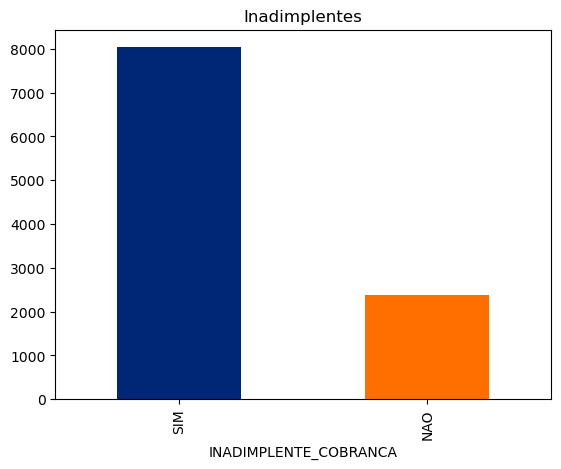

In [25]:
df_new['INADIMPLENTE_COBRANCA'].value_counts().plot(kind='bar', title='Inadimplentes', color=['#002776', '#FF6F00']
)

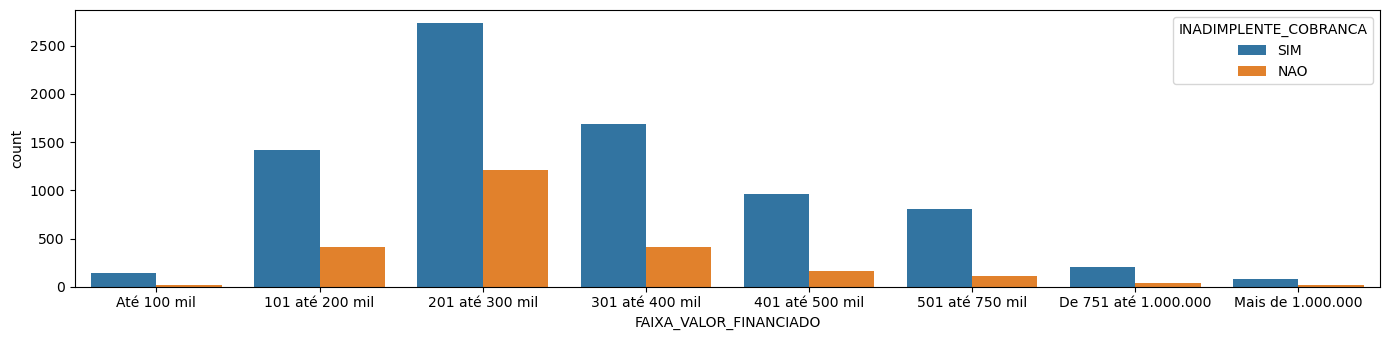

In [26]:
plt.rcParams["figure.figsize"] = [14.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_new, x = "FAIXA_VALOR_FINANCIADO", hue = "INADIMPLENTE_COBRANCA")
plt.show()

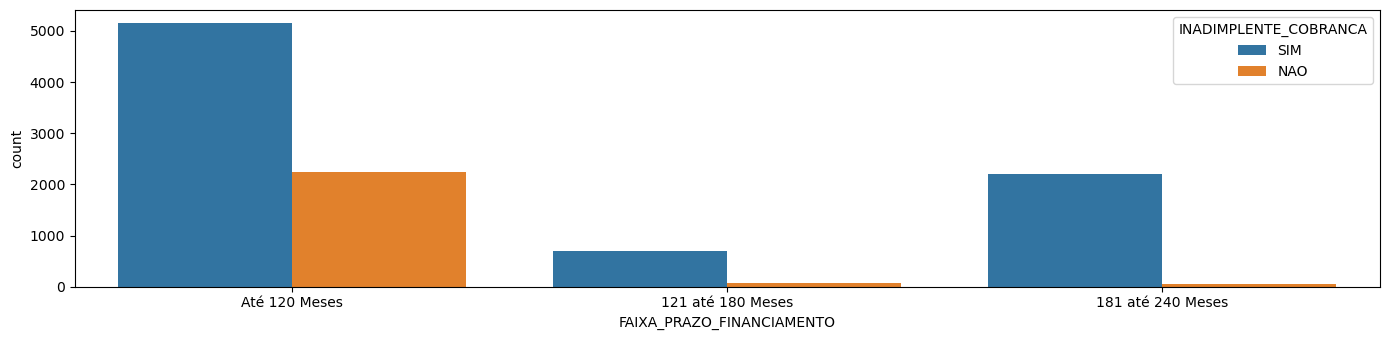

In [27]:
plt.rcParams["figure.figsize"] = [14.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_new, x = "FAIXA_PRAZO_FINANCIAMENTO", hue = "INADIMPLENTE_COBRANCA")
plt.show()

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   TAXA_AO_ANO                     10410 non-null  float64 
 1   CIDADE_CLIENTE                  10410 non-null  object  
 2   ESTADO_CLIENTE                  10410 non-null  object  
 3   RENDA_MENSAL_CLIENTE            10410 non-null  float64 
 4   QT_PC_ATRASO                    10410 non-null  int64   
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64   
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64   
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64 
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64   
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64   
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64   
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64   
 12  VALOR_PARCELA          

In [29]:
# da pra melhorar essa célula
variaveis_numericas = []
for i in df_new.columns[0:17].tolist():
    if df_new.dtypes[i] == 'int64' or df_new.dtypes[i] == 'float64':
        variaveis_numericas.append(i)

In [30]:
variaveis_numericas

['TAXA_AO_ANO',
 'RENDA_MENSAL_CLIENTE',
 'QT_PC_ATRASO',
 'QT_DIAS_PRIM_PC_ATRASO',
 'QT_TOTAL_PC_PAGAS',
 'VL_TOTAL_PC_PAGAS',
 'QT_PC_PAGA_EM_DIA',
 'QT_DIAS_MIN_ATRASO',
 'QT_DIAS_MAX_ATRASO',
 'QT_DIAS_MEDIA_ATRASO',
 'VALOR_PARCELA',
 'IDADE_DATA_ASSINATURA_CONTRATO']

In [31]:
len(variaveis_numericas)

12

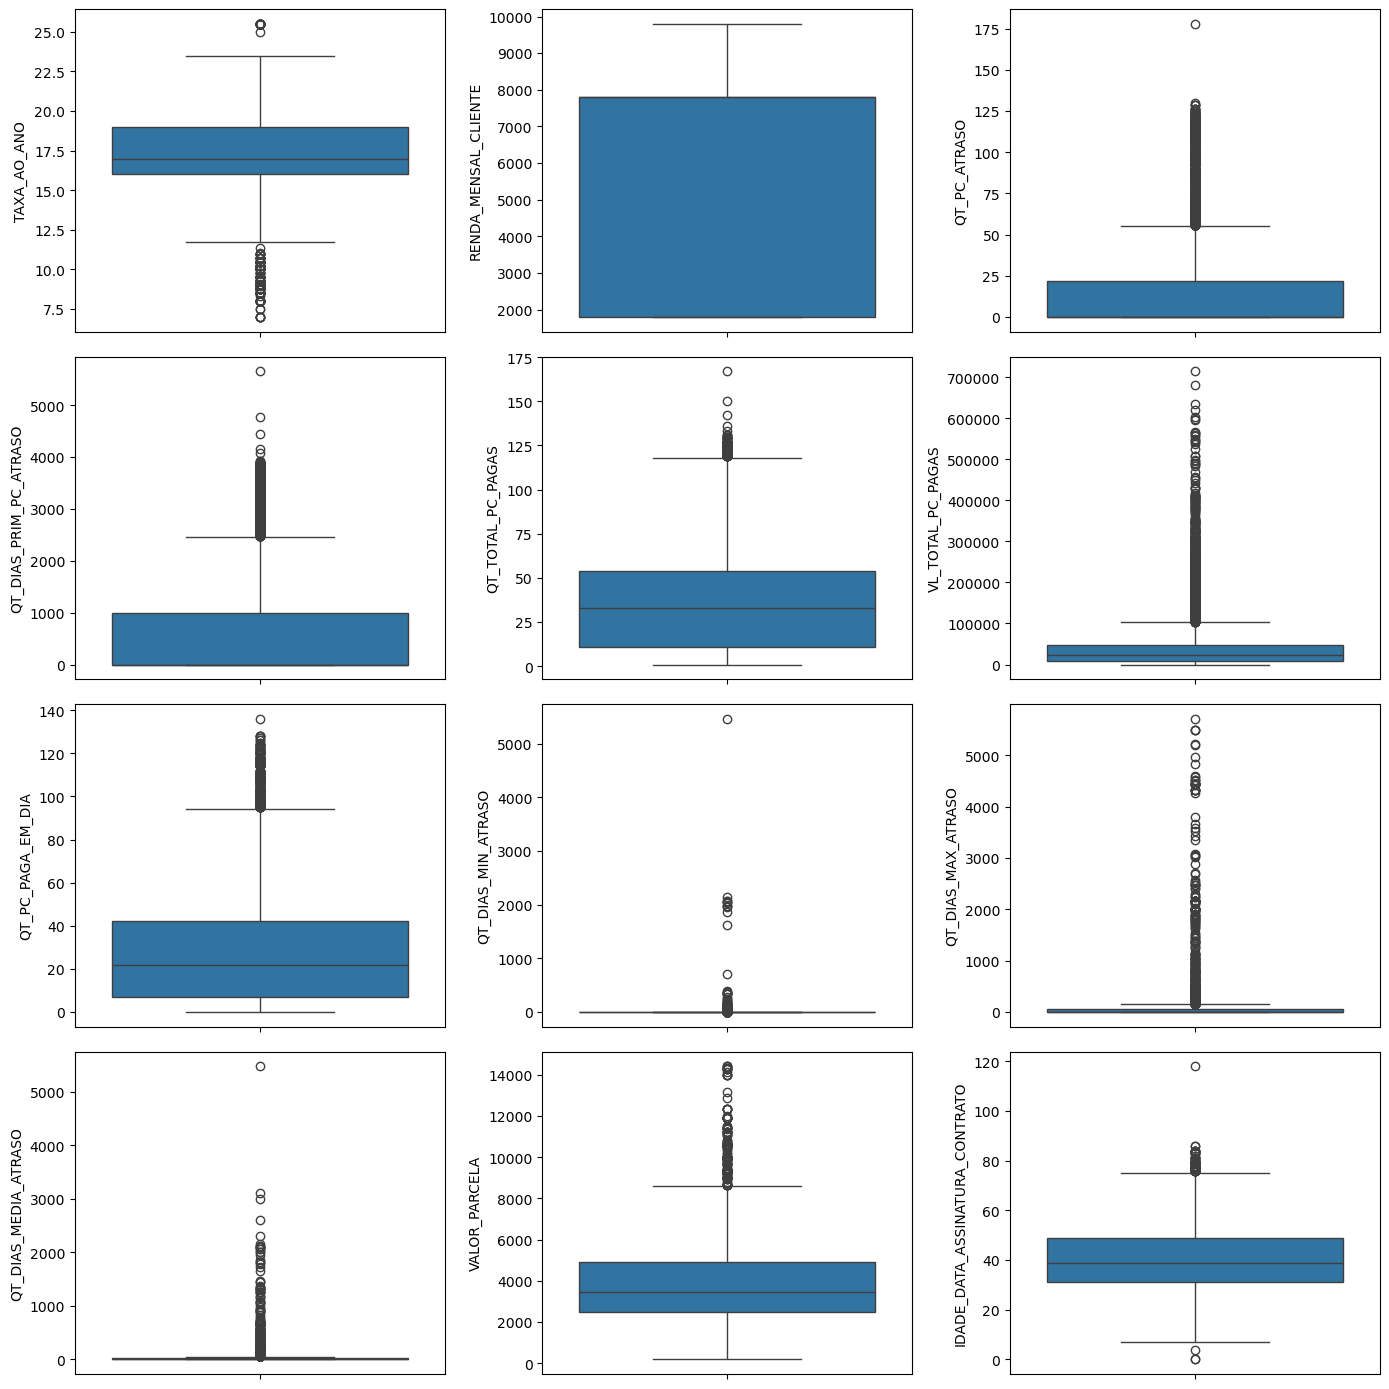

In [32]:
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(4, 3)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_new, y = i, ax = axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()

In [33]:
variaveis_categoricas = []
for i in df_new.columns[0:16].tolist():
    if df_new.dtypes[i] == 'object' or df_new.dtypes[i] == 'category':
        variaveis_categoricas.append(i)

In [34]:
variaveis_categoricas

['CIDADE_CLIENTE',
 'ESTADO_CLIENTE',
 'FAIXA_VALOR_FINANCIADO',
 'FAIXA_PRAZO_FINANCIAMENTO']

In [35]:
lb = LabelEncoder()

for i in variaveis_categoricas:
    df_new[i] = lb.fit_transform(df_new[i])

In [36]:
df_new.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_VALOR_FINANCIADO,FAIXA_PRAZO_FINANCIAMENTO,INADIMPLENTE_COBRANCA
0,15.0,152,5,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,5,0,SIM
1,15.0,453,25,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,2,1,SIM
2,18.0,453,25,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,4,1,SIM
3,15.0,453,25,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,3,1,SIM
4,17.0,453,25,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,4,1,SIM


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TAXA_AO_ANO                     10410 non-null  float64
 1   CIDADE_CLIENTE                  10410 non-null  int32  
 2   ESTADO_CLIENTE                  10410 non-null  int32  
 3   RENDA_MENSAL_CLIENTE            10410 non-null  float64
 4   QT_PC_ATRASO                    10410 non-null  int64  
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64  
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64  
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64  
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64  
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64  
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64  
 12  VALOR_PARCELA                   10410

In [38]:
df_new['INADIMPLENTE_COBRANCA'].value_counts()

INADIMPLENTE_COBRANCA
SIM    8035
NAO    2375
Name: count, dtype: int64

In [39]:
variaveis_explicativas = df_new.iloc[:,0:15]
variavel_resposta = df_new.iloc[:,16]

In [40]:
variaveis_explicativas.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_VALOR_FINANCIADO
0,15.0,152,5,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,5
1,15.0,453,25,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,2
2,18.0,453,25,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,4
3,15.0,453,25,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,3
4,17.0,453,25,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,4


In [41]:
variavel_resposta.head()

0    SIM
1    SIM
2    SIM
3    SIM
4    SIM
Name: INADIMPLENTE_COBRANCA, dtype: object

In [42]:
# Depois eu acho que vou mudar o SMOTE pra depois

seed = 100

balanceador = SMOTE(random_state=seed)

variaveis_explicativas_res, variavel_resposta_res = balanceador.fit_resample(variaveis_explicativas, variavel_resposta)

<Axes: title={'center': 'Inadimplentes X Não Inadimplentes'}, xlabel='INADIMPLENTE_COBRANCA'>

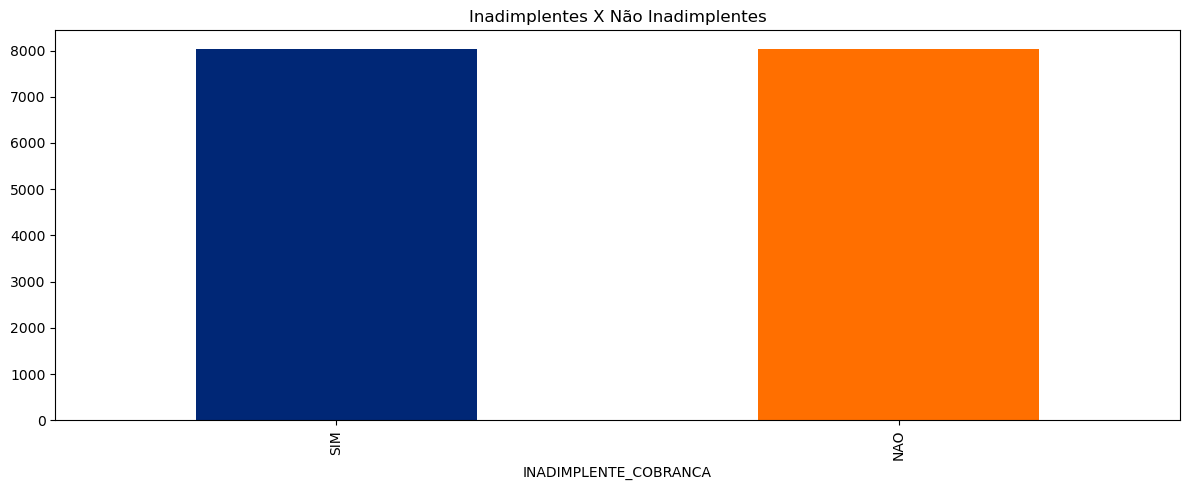

In [43]:
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
variavel_resposta_res.value_counts().plot(kind='bar', title='Inadimplentes X Não Inadimplentes', color = ['#002776', '#FF6F00'])

In [44]:
variaveis_explicativas_res.shape

(16070, 15)

In [45]:
variavel_resposta_res.shape

(16070,)

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(variaveis_explicativas_res, variavel_resposta_res, test_size = 0.3, random_state = 42)

In [49]:
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [51]:
X_treino_normalizados.shape

(11249, 15)

In [52]:
X_treino_normalizados

array([[0.45945946, 0.03816794, 0.15384615, ..., 0.50322829, 0.22033898,
        0.57142857],
       [0.66904491, 0.12977099, 0.23076923, ..., 0.40839172, 0.41221454,
        0.42857143],
       [0.59459459, 0.3110687 , 0.30769231, ..., 0.03970892, 0.25423729,
        0.        ],
       ...,
       [0.10810811, 0.3110687 , 0.30769231, ..., 0.16001324, 0.34745763,
        0.        ],
       [0.64864865, 0.86450382, 0.96153846, ..., 0.23265885, 0.44444926,
        0.14285714],
       [0.42432432, 0.10305344, 0.38461538, ..., 0.03852714, 0.3559322 ,
        0.        ]])

In [53]:
clf = RandomForestClassifier(n_estimators=300)

clf = clf.fit(X_treino_normalizados, y_treino)

In [54]:
scores = clf.score(X_teste_normalizados, y_teste)
scores

0.9222153080273802

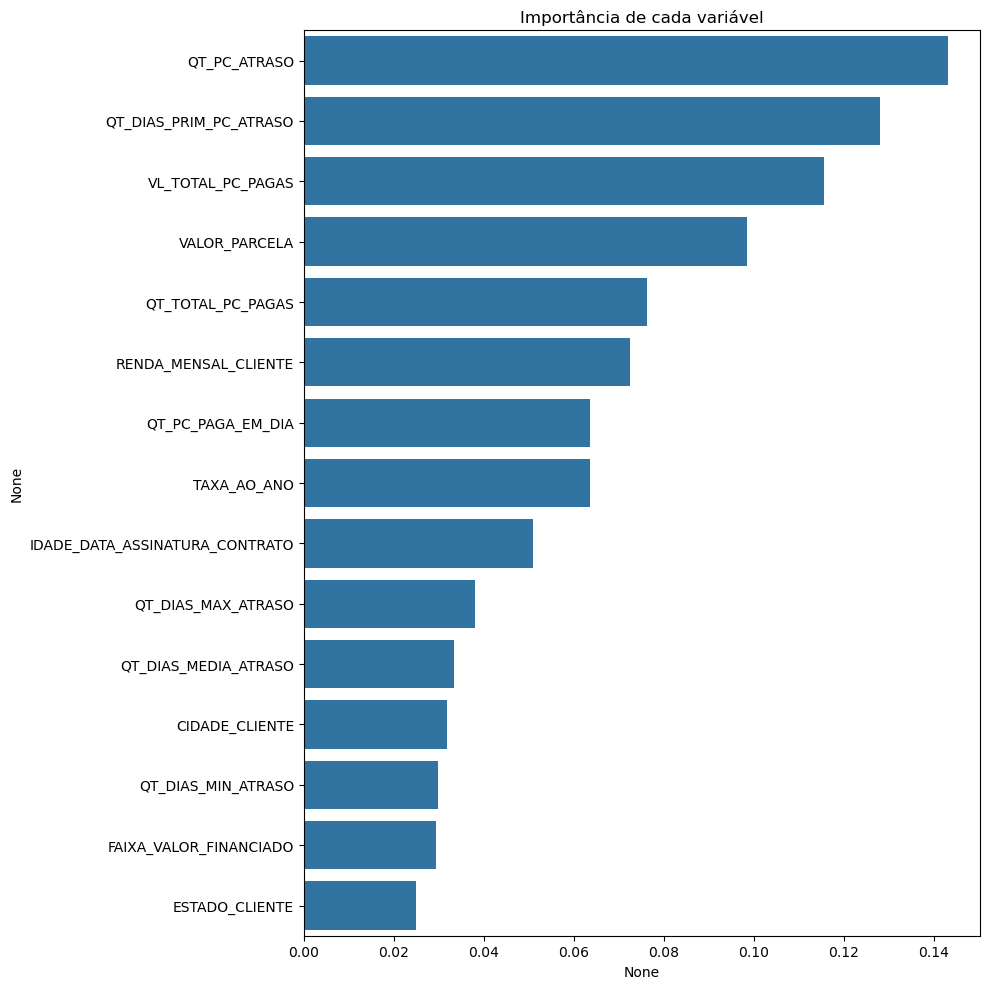

In [55]:
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=variaveis_explicativas.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [56]:
importances.sort_values(ascending=False)

QT_PC_ATRASO                      0.143154
QT_DIAS_PRIM_PC_ATRASO            0.128099
VL_TOTAL_PC_PAGAS                 0.115651
VALOR_PARCELA                     0.098500
QT_TOTAL_PC_PAGAS                 0.076296
RENDA_MENSAL_CLIENTE              0.072583
QT_PC_PAGA_EM_DIA                 0.063588
TAXA_AO_ANO                       0.063518
IDADE_DATA_ASSINATURA_CONTRATO    0.051040
QT_DIAS_MAX_ATRASO                0.038168
QT_DIAS_MEDIA_ATRASO              0.033490
CIDADE_CLIENTE                    0.031827
QT_DIAS_MIN_ATRASO                0.029762
FAIXA_VALOR_FINANCIADO            0.029486
ESTADO_CLIENTE                    0.024839
dtype: float64

In [57]:
joblib.dump(clf, 'modelo_treinado.pk')

['modelo_treinado.pk']

In [58]:
clf = joblib.load('modelo_treinado.pk')

In [59]:
conexao = conexao = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=MODELOS_PREDITIVOS;"
    "UID=usuario_python;"
    "PWD=123456;"
)

df_original = pd.read_sql_query('SELECT * FROM EXTRACAO_DADOS_SISTEMA', conexao)

conexao.close()

In [ ]:
df_original.dropna(inplace=True)


bins = [-100, 120, 180, 240]
labels = ['Até 120 Meses', '121 até 180 Meses', '181 até 240 Meses']
df_original['FAIXA_PRAZO_FINANCIAMENTO'] = pd.cut(df_original['PZ_FINANCIAMENTO'], bins=bins, labels=labels)
pd.value_counts(df_original.FAIXA_PRAZO_FINANCIAMENTO) #remover depois


bins = [-100, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 9000000000]
labels = ['Até 100 mil', '101 até 200 mil', '201 até 300 mil', '301 até 400 mil', '401 até 500 mil', 
          '501 até 750 mil', 'De 751 até 1.000.000','Mais de 1.000.000']
df_original['FAIXA_VALOR_FINANCIADO'] = pd.cut(df_original['VALOR_FINANCIAMENTO'], bins=bins, labels=labels)
pd.value_counts(df_original.FAIXA_VALOR_FINANCIADO) #remover depois

columns = ['TAXA_AO_ANO', 'CIDADE_CLIENTE', 'ESTADO_CLIENTE','RENDA_MENSAL_CLIENTE', 
           'QT_PC_ATRASO', 'QT_DIAS_PRIM_PC_ATRASO','QT_TOTAL_PC_PAGAS',
           'VL_TOTAL_PC_PAGAS', 'QT_PC_PAGA_EM_DIA','QT_DIAS_MIN_ATRASO',
           'QT_DIAS_MAX_ATRASO', 'QT_DIAS_MEDIA_ATRASO','VALOR_PARCELA',
           'IDADE_DATA_ASSINATURA_CONTRATO', 'FAIXA_VALOR_FINANCIADO',
           'FAIXA_PRAZO_FINANCIAMENTO','INADIMPLENTE_COBRANCA',]

df_new = df_original[columns].copy()

variaveis_categoricas = []
for i in df_new.columns[0:16].tolist():
        if df_new.dtypes[i] == 'object' or df_new.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i) 

lb = LabelEncoder()

for var in variaveis_categoricas:
    df_new[var] = lb.fit_transform(df_new[var])


variaveis_explicativas = df_new.iloc[:, 0:15]          
    

Normalizador = MinMaxScaler()
dados_normalizados = Normalizador.fit_transform(variaveis_explicativas)

previsoes = clf.predict(dados_normalizados)
probabilidades = clf.predict_proba(dados_normalizados)
df_original['PREVISOES'] = previsoes
df_original['PROBABILIDADES'] = probabilidades[:, 1]
df_original.head()

,NUMERO_CONTRATO,DATA_ASSINATURA_CONTRATO,TIPO_FINANCIAMENTO,TAXA_AO_ANO,PZ_FINANCIAMENTO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,INADIMPLENTE_COBRANCA,FAIXA_PRAZO_FINANCIAMENTO,FAIXA_VALOR_FINANCIADO,PREVISOES,PROBABILIDADES
0,41637,2012-03-23,IMOBILIARIO,15.0,180,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,73767.0,471.29,70.0,SIM,121 até 180 Meses,Até 100 mil,SIM,0.963333
1,67958,2012-01-24,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,323251.0,1858.69,28.0,SIM,181 até 240 Meses,301 até 400 mil,SIM,0.960000
2,68502,2014-05-23,IMOBILIARIO,18.0,200,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,529419.0,3123.57,60.0,SIM,181 até 240 Meses,501 até 750 mil,SIM,0.986667
3,68731,2015-10-23,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,499753.0,2873.58,41.0,SIM,181 até 240 Meses,401 até 500 mil,SIM,0.883333
4,68996,2017-01-24,IMOBILIARIO,17.0,200,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,722057.0,4224.03,63.0,SIM,181 até 240 Meses,501 até 750 mil,SIM,0.986667
